# Disease prediction

In [262]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 2.0 EDA

In [263]:
#reading the data in

df = pd.read_csv("Cardio-data/cardio_train.csv")

In [264]:
#data checking 

#df.info()
#df.describe()

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [265]:
# number of people with cardio 

df_cardio = pd.DataFrame(df[["cardio"]].value_counts()).rename(columns = {0:"Number of patients"})

print(f"Number of people WITH heart disease : {df_cardio[df_cardio.index == (1,)].values[0][0]}")
print(f"Number of people WITHOUT heart disease : {df_cardio[df_cardio.index == (0,)].values[0][0]}")


Number of people WITH heart disease : 34979
Number of people WITHOUT heart disease : 35021


Text(0.5, 1.0, 'Percentage of people by cholesterol type')

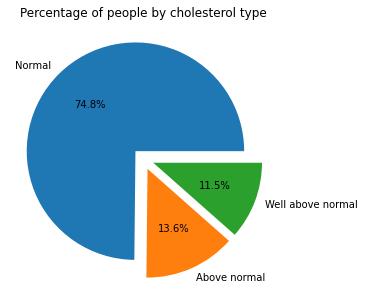

In [266]:
# number of people by cholesterol level
df_cholesterol = pd.DataFrame(df[["cholesterol"]].groupby("cholesterol").size()).rename(columns={0:"Number of people"}).reset_index()

plt.figure(figsize=(10,5))
plt.pie(df_cholesterol["Number of people"], 
            labels = ["Normal","Above normal","Well above normal"], 
            explode=(0.1, 0.1, 0.1),
            autopct='%1.1f%%'
            )
plt.title("Percentage of people by cholesterol type")

[Text(0.5, 1.0, 'Number of patients by age')]

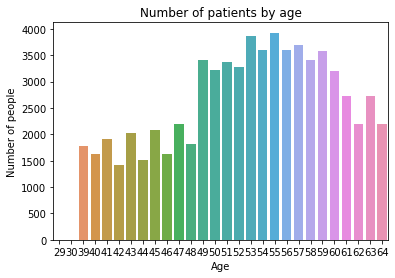

In [267]:
# Age distribution 

df_age = df["age"]//365 

df_age = pd.DataFrame(df_age.value_counts()).reset_index().rename(columns = {"index":"Age","age":"Number of people"}).sort_values("Age",ascending=True).reset_index(drop=True)

sns.barplot(data=df_age, 
                x="Age",
                y="Number of people"
            ).set(title="Number of patients by age")

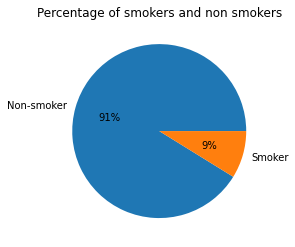

In [268]:
# Percentage of smokers 

df_smoke = df[["smoke"]].value_counts()

df_smoke = pd.DataFrame(df_smoke).reset_index().rename(columns = {0:"Number of patients"})
df_smoke["smoke"] = ["Non-smoker","Smoker"]

plt.pie(df_smoke["Number of patients"], 
            labels = df_smoke["smoke"],
            autopct='%.0f%%' 
            )
plt.title("Percentage of smokers and non smokers")
plt.show()

<AxesSubplot:xlabel='weight', ylabel='Number of patients'>

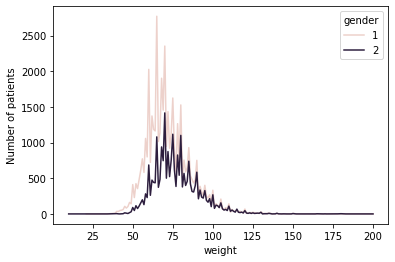

In [269]:
# Weight distribution 

df_weight = df[["weight","gender"]].astype("int32").groupby(["weight","gender"]).size()

df_weight = pd.DataFrame(df_weight).reset_index().rename(columns={0:"Number of patients"}).sort_values("weight",ascending=True).reset_index(drop=True)

sns.lineplot(data = df_weight, 
                x="weight", 
                y="Number of patients",
                hue="gender"
                )

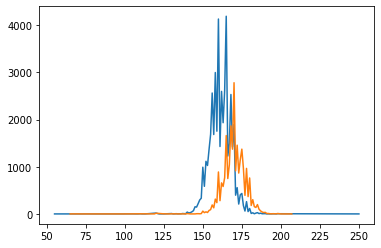

In [270]:
# Height distribution 

df_height = df_weight = df[["height","gender"]].astype("int32").groupby(["height","gender"]).size()

df_height = pd.DataFrame(df_height).reset_index().rename(columns={0:"Number of patients"}).sort_values("height",ascending=True).reset_index(drop=True)

plt.plot(df_height[df_height["gender"]==1]["height"],df_height[df_height["gender"]==1]["Number of patients"])
plt.plot(df_height[df_height["gender"]==2]["height"],df_height[df_height["gender"]==2]["Number of patients"])

#sns.lineplot(data = df_height, 
#                x="height", 
#                y="Number of patients",
#                hue="gender"
#                )

([<matplotlib.patches.Wedge at 0x7fb771ac2370>,
 [Text(-0.018075891633365444, 1.099851472764236, 'Cardio'),
  Text(0.018075891633365555, -1.099851472764236, 'No Cardio')],
 [Text(-0.00985957725456297, 0.5999189851441287, '51%'),
  Text(0.00985957725456303, -0.5999189851441287, '49%')])

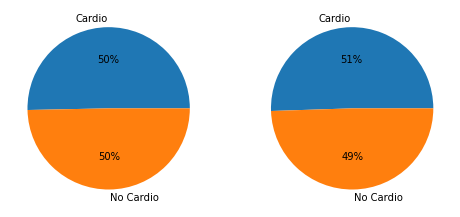

In [271]:
df_men_cardio = pd.DataFrame(df[df.gender == 1][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})
df_women_cardio = pd.DataFrame(df[df.gender == 2][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].pie(df_men_cardio["Number of patients"],
            labels = ["Cardio","No Cardio"],
            autopct='%.0f%%' )

ax[1].pie(df_women_cardio["Number of patients"],
            labels = ["Cardio","No Cardio"],
            autopct='%.0f%%' )

# 2.1.0 Feature engineering : BMI 

In [272]:
# create BMI index

df_modified = df[:]
df_modified["BMI"]=df_modified["weight"]/((df_modified["height"]*0.01)**2)

df_modified.head()

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_54878/875335930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified["BMI"]=df_modified["weight"]/((df_modified["height"]*0.01)**2)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [273]:
#cleaning unreal and extreme data 

df_modified = df_modified[ df_modified.BMI > 8 ]
df_modified.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000
mean,49972.089547,19468.831707,1.349544,164.358844,74.208256,128.816664,96.616412,1.366873,1.226453,0.088118,0.053759,0.803720,0.499693,27.557491
std,28851.641752,2467.287778,0.476829,8.210001,14.390684,154.014595,188.438397,0.680258,0.572274,0.283469,0.225544,0.397185,0.500003,6.089798
min,0.000000,10798.000000,1.000000,55.000000,21.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.001829
25%,25006.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50002.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.377898
75%,74889.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [274]:
df_modified["BMI Category"] = [ "normal range" if (X < 25 and X>18.4) 
                                                else ("overweight" if X<30 
                                                else ("obese (class I)" if X<35 
                                                else ("obese (class II)" if X<40 
                                                else ("obese (class III" if X>=40 
                                                else "Under weight"))))
                                                for X in df_modified["BMI"] ]

df_modified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range


# 2.1.1 Feature engineering : Blood pressure

In [278]:
df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]<0].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]<0].index)

df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]>300].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]>300].index)

df_modified["Blood pressure"] = [ "Healthy" if (i<120 and j<80) 
                                            else( "Elevated" if (i>=120 and i< 130  and j<80) 
                                            else( "Stage 1 hypertension" if ((i>=130 and i< 140)  or ( j<90  and j>=80))
                                            else( "Stage 2 hypertension" if ((i>=140 and i<=180)  or ( j<=120  and j>=90))
                                            else("Hypertension crisis" if i>180 or j>90
                                            else "Non classified")))) for i,j in zip(df_modified["ap_hi"],df_modified["ap_lo"])]

df_modified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category,Blood pressure
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I),Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight,Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range,Healthy


# 2.2.0 Data visualization

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_54878/501466190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio_age["age"]=df_cardio_age["age"]//365


<AxesSubplot:xlabel='gluc', ylabel='Number of patients'>

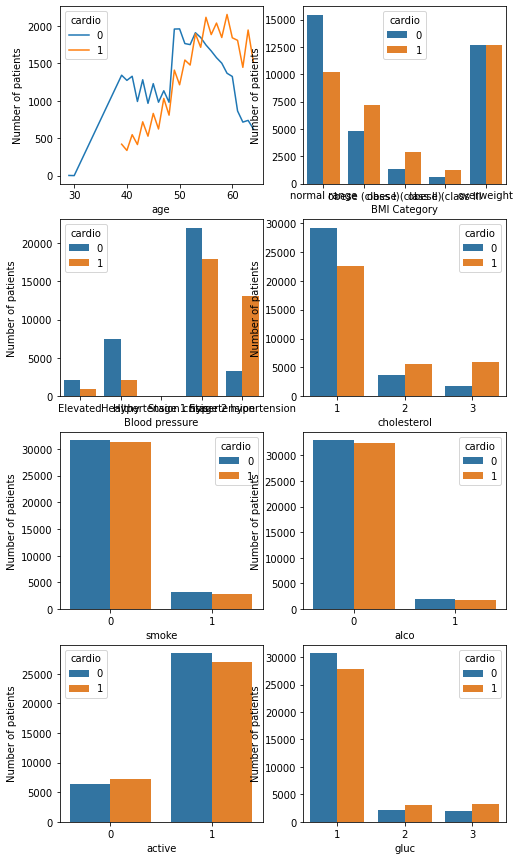

In [326]:
fig,ax = plt.subplots(4,2,figsize=(8,15))

# Cardio vs age 
df_cardio_age=df_modified[["cardio","age"]]
df_cardio_age["age"]=df_cardio_age["age"]//365
df_cardio_age = pd.DataFrame(df_cardio_age.groupby(["age","cardio"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.lineplot(x="age",y="Number of patients",data=df_cardio_age,hue="cardio",ax=ax[0,0])

# Cardio vs BMI 
df_cardio_BMI=pd.DataFrame(df_modified[["cardio","BMI Category"]].groupby(["cardio","BMI Category"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="BMI Category", y="Number of patients", data=df_cardio_BMI,hue="cardio",ax=ax[0,1])


# Cardio vs Blood pressure 
df_cardio_BP=pd.DataFrame(df_modified[["cardio","Blood pressure"]].groupby(["cardio","Blood pressure"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="Blood pressure", y="Number of patients", data=df_cardio_BP,hue="cardio",ax=ax[1,0])


# Cardio vs Cholesterol type 
df_cardio_CT=pd.DataFrame(df_modified[["cardio","cholesterol"]].groupby(["cardio","cholesterol"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="cholesterol", y="Number of patients", data=df_cardio_CT,hue="cardio",ax=ax[1,1])

# cardio vs smoker
df_cardio_smoking=pd.DataFrame(df_modified[["cardio","smoke"]].groupby(["cardio","smoke"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="smoke", y="Number of patients", data=df_cardio_smoking,hue="cardio",ax=ax[2,0])

# cardio vs alcohool 
df_cardio_alcohol=pd.DataFrame(df_modified[["cardio","alco"]].groupby(["cardio","alco"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="alco", y="Number of patients", data=df_cardio_alcohol,hue="cardio",ax=ax[2,1])

# cardio vs active 
df_cardio_activity=pd.DataFrame(df_modified[["cardio","active"]].groupby(["cardio","active"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="active", y="Number of patients", data=df_cardio_activity,hue="cardio",ax=ax[3,0])

# cardio vs glucose
df_cardio_gluc=pd.DataFrame(df_modified[["cardio","gluc"]].groupby(["cardio","gluc"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="gluc", y="Number of patients", data=df_cardio_gluc,hue="cardio",ax=ax[3,1])